# Notebook 2: HOLC and Tree Canopy Mapping

#### Welcome to *notebook 2*! This activity will take approximately [XX] minutes and we hope that by the end of the activity, you will be able to:
- Conceptualize HOLC data and understand its current social implications
- Develop specific methods to help read maps and graphs
- Become familiarized with tree coverage (tree canopy) data in California 
- Compare the similarities/differences between HOLC and Tree Canopy data

**Before we get started, let's import the libraries and packages needed for this activity. Don't worry if you don't understand it, just run the cell once prior to starting! Make sure to run this cell everytime you open the link.**

In [1]:
# Libraries that this notebook will use: 

# pip install libraries!


# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re

# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]

# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# Color Scheming
from matplotlib.colors import ListedColormap
#light_blue, light_red, light_green, light_yellow = '#99c2ff', '#ff8080', '#84e184', '#ffe680'
holc_cmap = ListedColormap(['#35952B', '#fee999', '#fa9856', '#b0222c'], name='holc_colors')

## 1. Background: *Richmond, Virginia*
<img src="tree_canopy_virginia.jpeg" width="550"/>

Let's explore the above photo, which details the neighborhoods of Richmond, Virginia and their tree coverage. This photo is adapted from New York Times' recent article titled <a href="https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html">*How Decades of Racist Housing Policy Left Neighborhoods Sweltering*</a>, published in August of 2020. Redlined areas are highlighted in the image above. Redlined neighborhoods are often denied banking and mortgage services, such as *loans* to purchase homes.

<div class="alert alert-warning">
<b>Warm-Up Question: </b> What patterns do you notice? Why do you think this pattern occurs? How do redlined neighborhoods relate to racist housing policies and the environment?
</div>

***Write your answer here, replacing this text***

To understand these questions further, we need to investigate the source of redlining's history: **HOLC**.

## 2. HOLC

The *Home Owners' Loan Corporation*, otherwise known as **HOLC**, began in the 1930s as a government-financed by-product of Roosevelt's New Deal. Its original goals were to refinance property mortgages to prevent foreclosures while expanding buying opportunities for those looking for new homes. 

HOLC primarily operated by issuing loans to borrowers. In the context of HOLC, loans were distributed to homeowners who struggled to make consistent housing payments. In addition to distributing loans, HOLC also assessed credit-worthiness for different groups of people within a specific city. This so-called credit-worthiness created borders, which targeted minorities (African Americans specifically) and separated neighborhoods on the basis of a perceived financial risk. This process of separation became known as ***redlining*** and can be found throughout several *HOLC maps*, including the one from the NYT article above. Let's conceptualize redlining and HOLC maps to somewhere closer to home, like Oakland.

### 2.1 Understanding HOLC Maps

In HOLC Maps, ratings are given as letter grades to each neighborhood, signifying the neighborhood's investment credibility for lending purposes. Each neighborhood's rating was primarily a function of neighborhood racial and ethnic makeup, housing conditions, and access to public facilities, among other factors. 

Ratings assigned to neighborhoods included: **“A-Best”, “B-Still Desirable”, “C-Definitely Declining”, and “D-Hazardous”.** 

Let's analyze the HOLC map for Oakland.

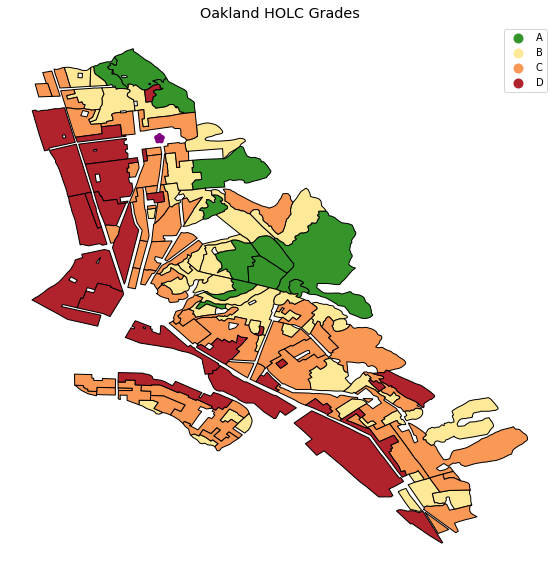

In [46]:
# Create a HOLC Map of Oakland using Geopandas

# Read in data
oakland = gpd.read_file('holc_oakland')

# Oakland HOLC Map
base = oakland.plot(column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])

# UC Berkeley Coordinates
berkeley = pd.DataFrame({'City': ['Berkeley'], 'Latitude': [37.8712], "Longitude":[-122.2601]})
gdf = gpd.GeoDataFrame(berkeley, geometry=gpd.points_from_xy(berkeley.Longitude, berkeley.Latitude))
gdf.plot(ax=base, marker='*', color='purple', linewidth=5)

plt.title('Oakland HOLC Grades', size='x-large')
plt.axis('off');

<div class="alert alert-warning">
<b>Question 2.1: </b> Berkeley is the purple dot in the Oakland map above. What do you notice about UC Berkeley? What grades do areas in the city of Berkeley have (Northside, Southside, Downtown), and why do you think this is the case?
</div>

***Write your answer here, replacing this text.***

<div class="alert alert-warning">
<b>Question 2.2: </b> What part of Oakland is given an **A** grade? What factors may separate these areas from the rest? 
</div>

***Write your answer here, replacing this text.***

## 3. Connections Between HOLC and Tree Canopy Data

The data we are using is from the [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus). It contains the mean tree canopy rate in 2016 for 7 areas in California (San Francisco, Oakland, San Jose, Fresno, Stockton, Los Angeles, and San Diego). Each city is broken into different neighborhood based on HOLC areas.

*Here is more information on what our dataset contains:*

|Column Name| Meaning|
|---|---|
|holc_grade|HOLC letter grade for a certain neighborhood in a California area|
|area| City corresponding to a row in the dataset
|_count |number of parts in a neighborhood that are covered by a tree|
|_sum | total size of the neighborhood|
|_mean | Mean tree coverage for a specific neighborhood in a given area|
|geometry| Shape of the neighborhood that we use to create our map|

In [48]:
# Import data
holc_5072 = gpd.read_file('holc_ca_epsg5072_treecov').drop(columns=['name', 'holc_id', 'area_descr'])
holc_5072.head()

,holc_grade,area,_count,_sum,_mean,geometry
0,A,Oakland,7737.0,176517.0,22.814657,"POLYGON ((-2256129.514 1954655.076, -2256108.7..."
1,A,Berkeley,2130.0,17375.0,8.157277,"POLYGON ((-2258485.837 1965737.749, -2258407.4..."
2,A,Oakland,194.0,622.0,3.206186,"POLYGON ((-2258903.873 1954942.364, -2258949.8..."
3,A,Oakland,345.0,3700.0,10.724638,"POLYGON ((-2256129.514 1954655.076, -2256191.2..."
4,A,Berkeley,746.0,7629.0,10.226542,"POLYGON ((-2259866.714 1965745.875, -2259877.5..."


<div class="alert alert-warning">
<b>Question: </b> Looking at the first row in the table. What does an average tree canopy of 22.814 mean for Oakland? Is it significant that it is in an A-HOLC grade area?
</div>

***Write your answer here, replacing this text***

Now that we have a better understanding of HOLC areas and their histories, let's apply this knowledge to a dataset about tree canopy coverage to investigate disparities in these environments. Let's compare these mean tree canopy scores across different HOLC grades. What possible relationship might there be?

### 3.1 HOLC & Tree Canopy Coverage

We created groups where each represented a different HOLC grade. For each group, we calculated a new mean tree coverage score based on the total _count and _sum across all individual areas with the same HOLC grade.

In [49]:
summed = holc_5072.groupby('holc_grade').sum()
summed['_new_mean'] = summed['_sum'] / summed['_count']
summed['_holc_area'] = summed['_count'] / sum(summed['_count'])
summed['color'] = ['#35952B', '#fee999', '#fa9856', '#b0222c']
summed

,_count,_sum,_mean,_new_mean,_holc_area,color
holc_grade,,,,,,
A,158447.0,1949246.0,997.073556,12.302196,0.116667,#35952B
B,278064.0,1660062.0,1227.833558,5.970072,0.204742,#fee999
C,575920.0,1537332.0,788.765300,2.669350,0.424057,#fa9856
D,345687.0,471935.0,257.113475,1.365209,0.254534,#b0222c


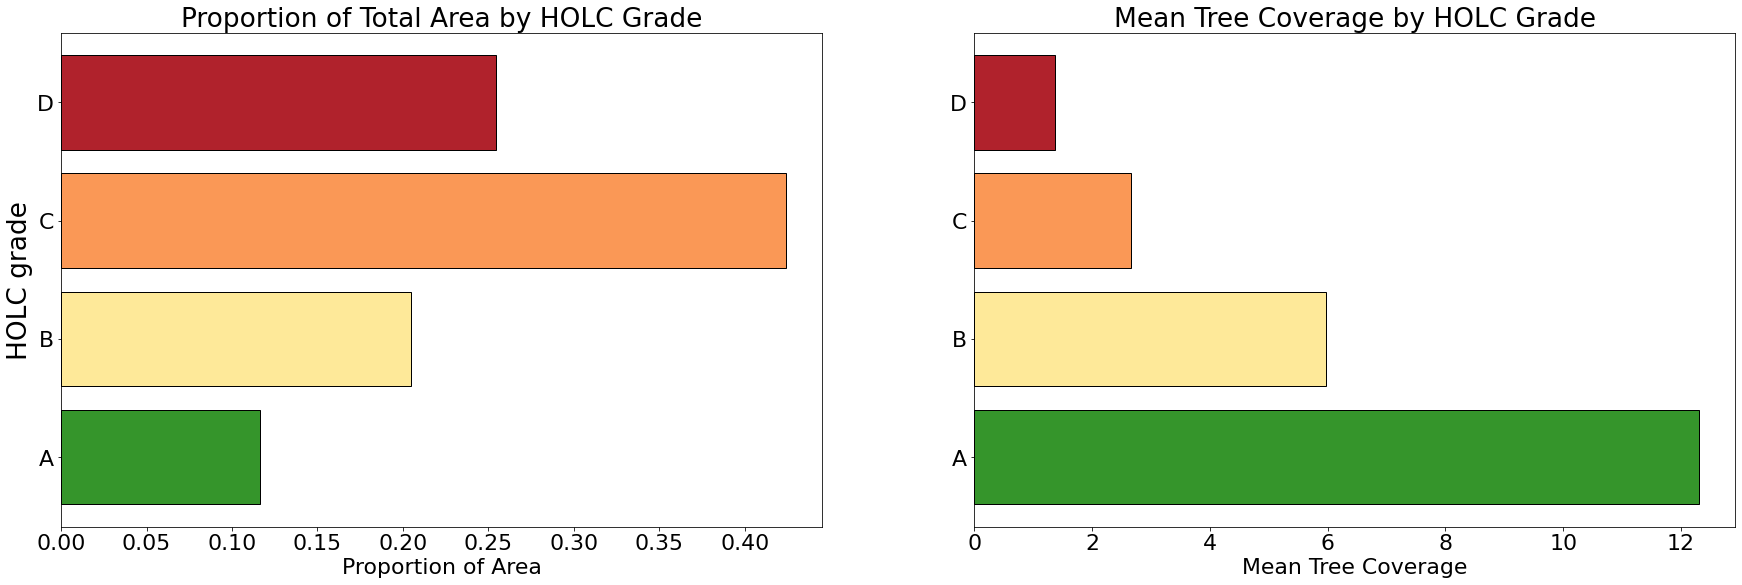

In [50]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax1.set_xlabel("Proportion of Area")
plt.barh(summed.index, summed["_holc_area"], color = summed['color'])

ax2=plt.subplot(2, 2, 2)
ax2.set_xlabel("Mean Tree Coverage")
plt.barh(summed.index, summed['_new_mean'], color=summed['color']);

ax1.set_ylabel('HOLC grade', fontsize='large');

ax1.set_title("Proportion of Total Area by HOLC Grade");
ax2.set_title("Mean Tree Coverage by HOLC Grade");

Consider the following to answer the question below:
- Which HOLC grade has the highest mean tree coverage? Which has the lowest?
- Which HOLC grades cover the largest area?

<div class="alert alert-warning">
<b>Question: </b> What are possible implications for neighborhoods in different HOLC areas in regards to mean tree canopy coverage?
</div>

***Write your answer here, replacing this text***

We have seen how tree coverage varies across different HOLC grades, but how does this relationship hold for individual cities. Let's map HOLC areas and tree coverage for different cities in California. 

## 4. Visualizing Tree Canopy and HOLC Data across California

To visualize this, let's play around with a widget, which contains the side-by-side comparisons of Tree Canopy and HOLC Data for Los Angeles, Fresno, San Francisco, San Jose, Stockton, San Diego, and Oakland. Simply select a city in the drop down menu and the widget will update.

In [62]:
import ipywidgets as widgets
plt.rcParams.update({'font.size': 15});

%run -i widget_script_AC.py
widgets.VBox([widgets.VBox([inp]), out])
#the legend for the tree canopy graph is off because it offsets the size of the size of the graph 

<Figure size 2160x1440 with 0 Axes>

<div class="alert alert-warning">
<b>Question: </b> Based on the city you selected, what patterns do you notice from your plot above?
</div>

***Write your answer here, replacing this text***

In [2]:
#add question about a pre-selected city and the relationship in the widget

## 5. Reflection

Summary ....

<div class="alert alert-warning">
<b>Question: </b> ...?
</div>

***Write your answer here, replacing this text***

#maybe some reflective questions revisiting the learning outcomes, etc.? or feedback, 

**Acknowledgements:**
- Article referenced: <a href="https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html">*How Decades of Racist Housing Policy Left Neighborhoods Sweltering*</a>
- Data from the [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus)
- Notebook Developed by Alexander Cui & Ashley Quiterio